In [94]:
import pandas as pd

# Read the CSV data into a DataFrame named 'income_data'
income_data = pd.read_csv("/Users/slight_meaning/Downloads/adult/adult.data")

# Now you can use 'income_data' to convert to CSV
income_data.to_csv("/Users/slight_meaning/Downloads/adult/adult.data")  # This line is optional, already converted once

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset without headers
dataset = income_data

# Updated column names based on your descriptions
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
]
dataset.columns = column_names

# Verify the column names and data 
print(dataset.columns)
print(dataset.head())



Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')
   age          workclass  fnlwgt   education  education-num  \
0   50   Self-emp-not-inc   83311   Bachelors             13   
1   38            Private  215646     HS-grad              9   
2   53            Private  234721        11th              7   
3   28            Private  338409   Bachelors             13   
4   37            Private  284582     Masters             14   

        marital-status          occupation    relationship    race      sex  \
0   Married-civ-spouse     Exec-managerial         Husband   White     Male   
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
3   Married-civ-spouse      Prof-specialty     

In [95]:
# this allows you to see a random sample
dataset.sample(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
20942,35,Private,452283,HS-grad,9,Divorced,Sales,Own-child,White,Female,0,0,40,United-States,<=50K
7041,37,Federal-gov,33487,Some-college,10,Divorced,Tech-support,Unmarried,Amer-Indian-Eskimo,Female,0,0,20,United-States,<=50K
15820,27,Private,110931,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K
6682,25,Private,279667,10th,6,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,45,United-States,<=50K
7034,51,Private,216475,Bachelors,13,Never-married,Sales,Not-in-family,White,Female,0,1564,43,United-States,>50K


<span style="font-size:20px; color:blue;">Data Consistency</span>

In [96]:
# Define a function to remove white spaces
def remove_whitespace(column):
    return column.str.replace(' ', '', regex=True) if column.dtype == 'object' else column

# Apply the function to all columns
dataset = dataset.apply(remove_whitespace)

# Verify the changes
print(dataset.head())


   age         workclass  fnlwgt  education  education-num  \
0   50  Self-emp-not-inc   83311  Bachelors             13   
1   38           Private  215646    HS-grad              9   
2   53           Private  234721       11th              7   
3   28           Private  338409  Bachelors             13   
4   37           Private  284582    Masters             14   

       marital-status         occupation   relationship   race     sex  \
0  Married-civ-spouse    Exec-managerial        Husband  White    Male   
1            Divorced  Handlers-cleaners  Not-in-family  White    Male   
2  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
3  Married-civ-spouse     Prof-specialty           Wife  Black  Female   
4  Married-civ-spouse    Exec-managerial           Wife  White  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0             0             0              13  United-States  <=50K  
1             0             0             

<span style="font-size:20px; color:blue;">Duplicated Rows</span>

In [97]:
# Identify duplicate rows
duplicates = dataset.duplicated()

# Print the number of duplicate rows
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 24


In [98]:
# Display duplicate rows
duplicate_rows = dataset[duplicates]
print(duplicate_rows)

       age         workclass  fnlwgt     education  education-num  \
4880    25           Private  308144     Bachelors             13   
5103    90           Private   52386  Some-college             10   
9170    21           Private  250051  Some-college             10   
11630   20           Private  107658  Some-college             10   
13083   25           Private  195994       1st-4th              2   
15058   21           Private  243368     Preschool              1   
17039   46           Private  173243       HS-grad              9   
18554   30           Private  144593       HS-grad              9   
18697   19           Private   97261       HS-grad              9   
21317   19           Private  138153  Some-college             10   
21489   19           Private  146679  Some-college             10   
21874   49           Private   31267       7th-8th              4   
22299   25           Private  195994       1st-4th              2   
22366   44           Private  3677

In [99]:
# Remove duplicate rows
dataset_cleaned = dataset.drop_duplicates()

# Verify the removal
print(f"Number of rows after removing duplicates: {dataset_cleaned.shape[0]}")

Number of rows after removing duplicates: 32536


<span style="font-size:20px; color:blue;">2 rows for testing</span>

In [100]:
# Display the first few rows of the dataset to understand its structure
print(dataset.head())

# Step 1: Separate 2 rows for deployment testing
deployment_test_rows = dataset.sample(n=2, random_state=42)
print("Deployment Test Rows:\n", deployment_test_rows)

# Step 2: Remove these rows from the main dataset
df = dataset.drop(deployment_test_rows.index)
print("Dataset after removing deployment test rows:\n", df.head())

   age         workclass  fnlwgt  education  education-num  \
0   50  Self-emp-not-inc   83311  Bachelors             13   
1   38           Private  215646    HS-grad              9   
2   53           Private  234721       11th              7   
3   28           Private  338409  Bachelors             13   
4   37           Private  284582    Masters             14   

       marital-status         occupation   relationship   race     sex  \
0  Married-civ-spouse    Exec-managerial        Husband  White    Male   
1            Divorced  Handlers-cleaners  Not-in-family  White    Male   
2  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
3  Married-civ-spouse     Prof-specialty           Wife  Black  Female   
4  Married-civ-spouse    Exec-managerial           Wife  White  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0             0             0              13  United-States  <=50K  
1             0             0             

<span style="font-size:20px; color:blue;">Exploratoray Data Analysis begins from here...</span>

In [101]:
#  this prints the number of rows and columns of the dataset
dataset.shape

(32560, 15)

In [102]:
# this prints the column names in the dataset
dataset.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [103]:
# this prints the first 5 rows of the dataset

dataset.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [104]:
# this prints the last 5 rows of the dataset
dataset.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [105]:
# this prints the size of the data
dataset.size

488400

In [106]:
# we use .info() to see more details such as missing rows
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education-num   32560 non-null  int64 
 5   marital-status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital-gain    32560 non-null  int64 
 11  capital-loss    32560 non-null  int64 
 12  hours-per-week  32560 non-null  int64 
 13  native-country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [107]:
# check for unique values in each column. This is especially useful for categorical data

dataset.nunique() #you can look at unique number, for e.g native-country has a really high unique number

# df.nunique()

age                  73
workclass             9
fnlwgt            21647
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       42
income                2
dtype: int64

In [108]:
dataset.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


<span style="font-size:19px; color:purple;">Missing Values</span>

In [109]:
import pandas as pd

# Load your dataset
# dataset = pd.read_csv('your_data.csv')

# Define missing value marker
missing_value_marker = '?'

# Replace '?' with pd.NA in all columns
dataset.replace(missing_value_marker, pd.NA, inplace=True)

# Count missing values in each column
missing_values_count = dataset.isna().sum()

# Display the count of missing values for each column
print("Missing values in each column:")
print(missing_values_count)


Missing values in each column:
age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64


In [110]:
# Count missing values in each column
missing_values_count = dataset.isna().sum()

# Filter columns with missing values
columns_with_missing_values = missing_values_count[missing_values_count > 0]

# Display the count of missing values for each column
print("Columns with missing values:")
print(columns_with_missing_values)

Columns with missing values:
workclass         1836
occupation        1843
native-country     583
dtype: int64


<span style="font-size:19px; color:purple;">workclass column</span>

In [111]:
# Create an indicator column for missing values
dataset['workclass_missing'] = dataset['workclass'].isna()

# Check for missing values in the 'native-country' column
missing_values = dataset['workclass'].isna().sum()
print(f"Number of missing values in 'workclass': {missing_values}")

# Check for any specific values that might be considered missing
missing_values_check = dataset['workclass'].value_counts(dropna=False)
print("Counts including missing values:\n", missing_values_check)


dataset['workclass'].fillna('Unknown Workclass', inplace=True)

Number of missing values in 'workclass': 1836
Counts including missing values:
 Private             22696
Self-emp-not-inc     2541
Local-gov            2093
<NA>                 1836
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64


In [112]:
import pandas as pd
import plotly.express as px

# Calculate counts of each workclass
workclass_counts = dataset['workclass'].value_counts().reset_index()
workclass_counts.columns = ['workclass', 'count']

# Create the interactive bar chart
fig = px.bar(workclass_counts, x='workclass', y='count', title='Distribution of Individuals by Workclass')
fig.show()


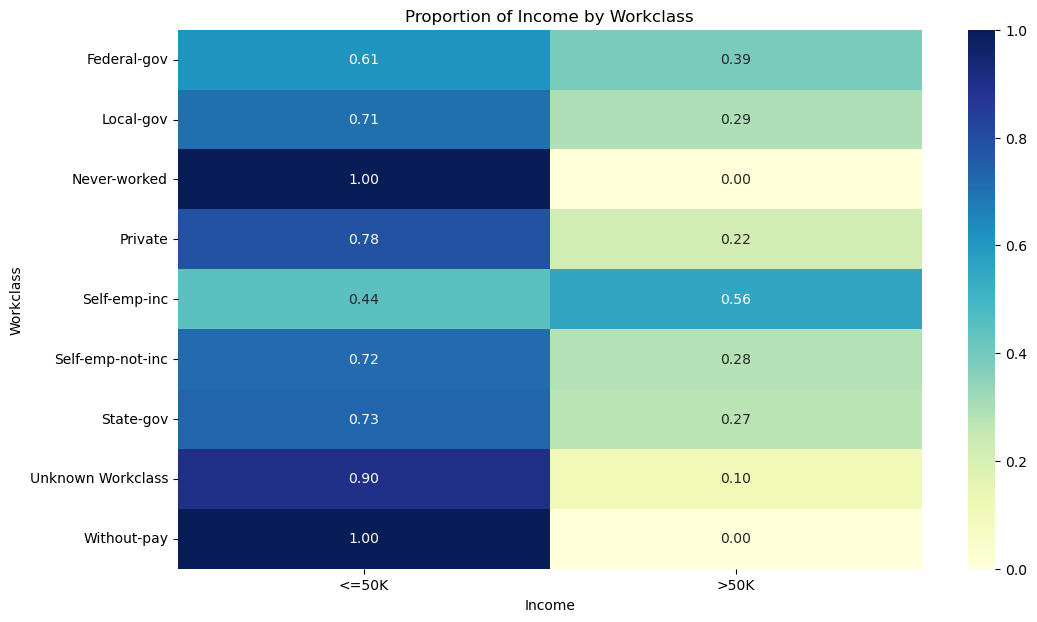

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Create a crosstab of workclass and income
workclass_income_crosstab = pd.crosstab(dataset['workclass'], dataset['income'])

# Normalize the crosstab by row to get proportions
workclass_income_normalized = workclass_income_crosstab.div(workclass_income_crosstab.sum(axis=1), axis=0)

# Plot heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(workclass_income_normalized, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Proportion of Income by Workclass')
plt.xlabel('Income')
plt.ylabel('Workclass')
plt.show()


<span style="font-size:19px; color:purple;">marital status column</span>

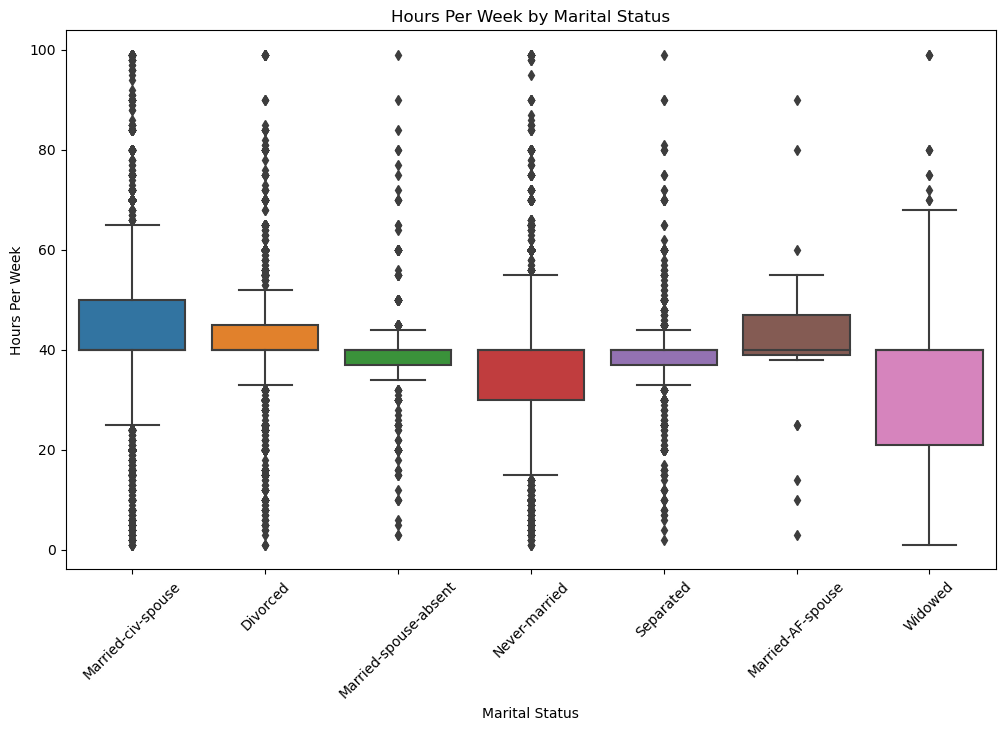

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))
sns.boxplot(data=dataset, x='marital-status', y='hours-per-week')
plt.title('Hours Per Week by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Hours Per Week')
plt.xticks(rotation=45)
plt.show()


<span style="font-size:19px; color:purple;">sex column</span>

In [115]:
# groupby "type" and apply .size() function to count the number of rows for each group
# “axis 0” represents rows and “axis 1” represents columns

dataset_type = dataset.groupby('sex', axis=0).size() # to find the distribution for classification

dataset_type.head()

sex
Female    10771
Male      21789
dtype: int64

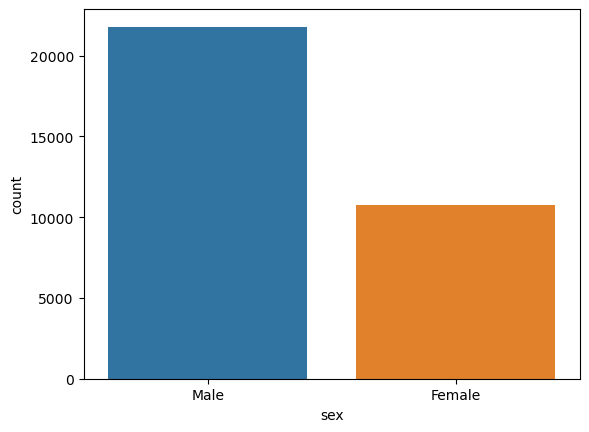

In [116]:
# Visualise it using a bar chart
import seaborn as sns

sns.countplot(x=dataset['sex'])
plt.show()

<span style="font-size:19px; color:purple;">native_country column</span>

<span style="font-size:19px; color:purple;">Missing values in native_country</span>

In [117]:
# Create an indicator column for missing values
dataset['native-country_missing'] = dataset['native-country'].isna()

# Check for missing values in the 'native-country' column
missing_values = dataset['native-country'].isna().sum()
print(f"Number of missing values in 'native-country': {missing_values}")

# Check for any specific values that might be considered missing
missing_values_check = dataset['native-country'].value_counts(dropna=False)
print("Counts including missing values:\n", missing_values_check)


dataset['native-country'].fillna('Unknown', inplace=True)


Number of missing values in 'native-country': 583
Counts including missing values:
 United-States                 29169
Mexico                          643
<NA>                            583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua       

Counts including missing values:
 United-States                 29169
Mexico                          643
Unknown                         583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                          

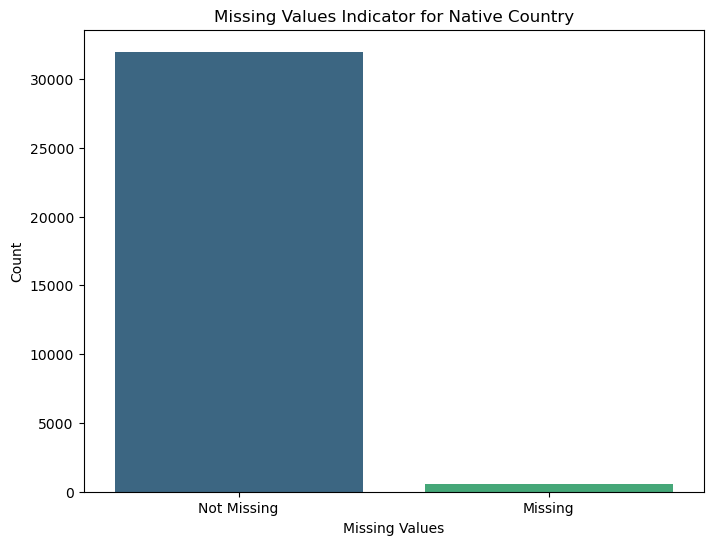

In [118]:
# Check for counts including missing values
missing_values_check = dataset['native-country'].value_counts(dropna=False)
print("Counts including missing values:\n", missing_values_check)

# Plot the indicator column counts
plt.figure(figsize=(8, 6))
sns.countplot(x=dataset['native-country_missing'], palette='viridis')
plt.title('Missing Values Indicator for Native Country')
plt.xlabel('Missing Values')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Missing', 'Missing'])
plt.show()


<span style="font-size:19px; color:purple;">Occupation column</span>

In [119]:
# Create an indicator column for missing values
dataset['occupation_missing'] = dataset['occupation'].isna()

# Check for missing values in the 'native-country' column
missing_values = dataset['occupation'].isna().sum()
print(f"Number of missing values in 'occupation': {missing_values}")

# Check for any specific values that might be considered missing
missing_values_check = dataset['occupation'].value_counts(dropna=False)
print("Counts including missing values:\n", missing_values_check)


dataset['occupation'].fillna('Unknown occupation', inplace=True)


Number of missing values in 'occupation': 1843
Counts including missing values:
 Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3769
Sales                3650
Other-service        3295
Machine-op-inspct    2002
<NA>                 1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64


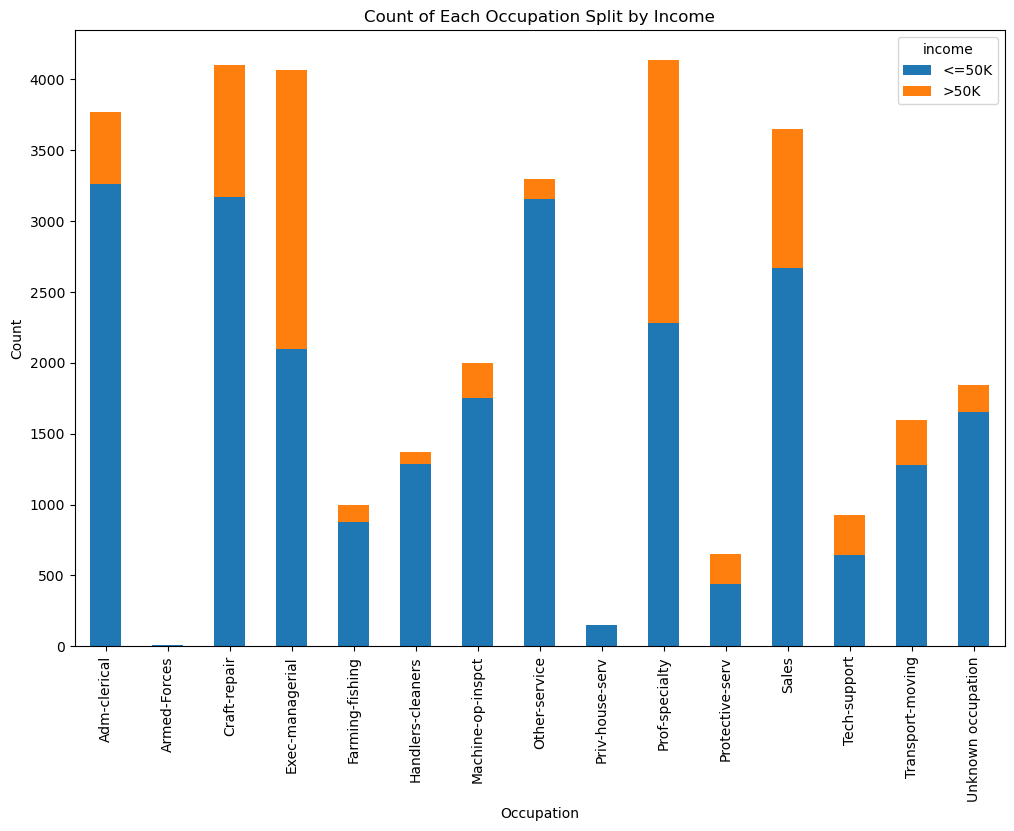

In [120]:
import seaborn as sns

# Count of each occupation split by income category
occupation_income_counts = pd.crosstab(dataset['occupation'], dataset['income'])

# Plot the stacked bar chart
occupation_income_counts.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Count of Each Occupation Split by Income')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


<span style="font-size:19px; color:purple;">Relationship Column</span>

In [121]:
# groupby "type" and apply .size() function to count the number of rows for each group
# “axis 0” represents rows and “axis 1” represents columns

dataset_type = dataset.groupby('relationship', axis=0).size() # to find the distribution for classification

dataset_type.head()

relationship
Husband           13193
Not-in-family      8304
Other-relative      981
Own-child          5068
Unmarried          3446
dtype: int64

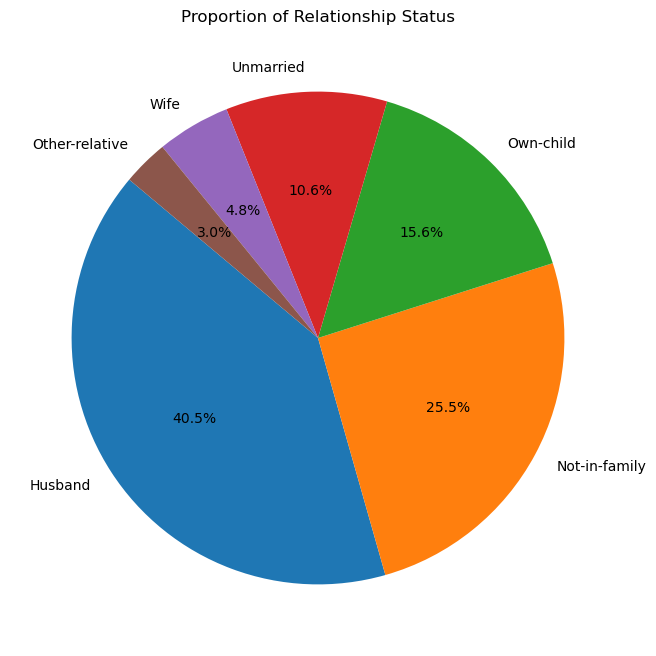

In [122]:
# Pie chart
relationship_counts = dataset['relationship'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(relationship_counts, labels=relationship_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Relationship Status')
plt.show()


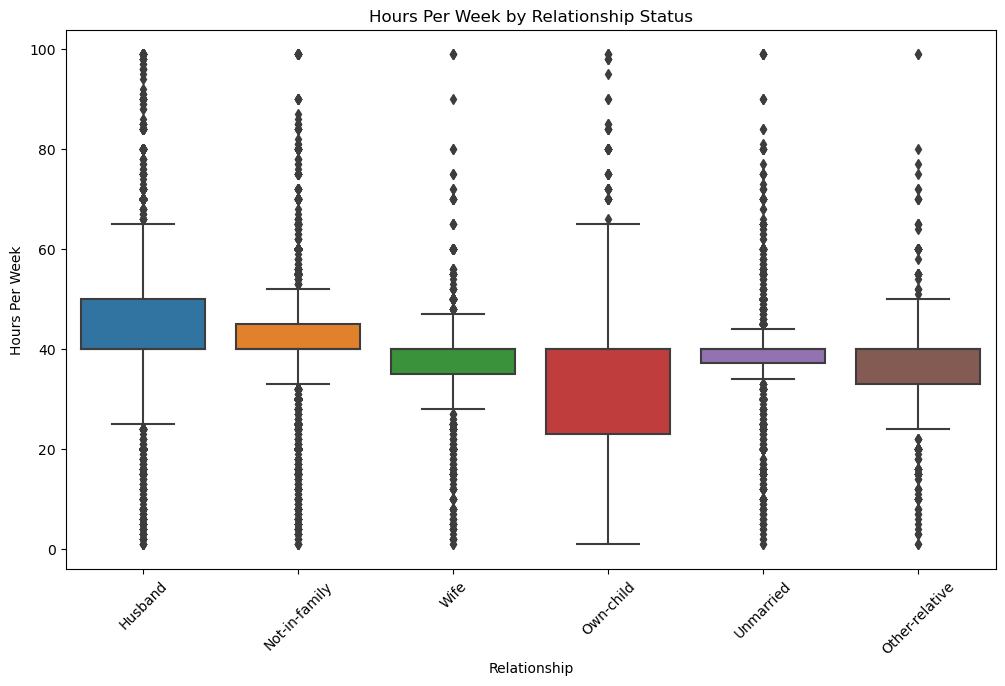

In [123]:
# Box plot
plt.figure(figsize=(12, 7))
sns.boxplot(data=dataset, x='relationship', y='hours-per-week')
plt.title('Hours Per Week by Relationship Status')
plt.xlabel('Relationship')
plt.ylabel('Hours Per Week')
plt.xticks(rotation=45)
plt.show()


<span style="font-size:19px; color:purple;">Race Column</span>

In [124]:
import pandas as pd
import plotly.express as px

# Calculate counts of each race
race_counts = dataset['race'].value_counts().reset_index()
race_counts.columns = ['race', 'count']

# Create the interactive pie chart
fig = px.pie(race_counts, names='race', values='count', title='Proportion of Individuals by Race')

# Show the plot
fig.show()


In [125]:
# Create a grouped DataFrame to count the income levels for each race
income_by_race = dataset.groupby(['race', 'income']).size().reset_index(name='count')

# Create the interactive stacked bar plot
fig = px.bar(income_by_race, x='race', y='count', color='income',
             title='Income Levels by Race',
             labels={'count': 'Number of Individuals', 'race': 'Race', 'income': 'Income'},
             barmode='stack')

# Show the plot
fig.show()


In [126]:
# groupby "type" and apply .size() function to count the number of rows for each group
# “axis 0” represents rows and “axis 1” represents columns

dataset_type = dataset.groupby('race', axis=0).size() # to find the distribution for classification

dataset_type.head()

race
Amer-Indian-Eskimo      311
Asian-Pac-Islander     1039
Black                  3124
Other                   271
White                 27815
dtype: int64

<span style="font-size:19px; color:purple;">Age Column</span>

In [127]:
dataset['age'].describe()

count    32560.000000
mean        38.581634
std         13.640642
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

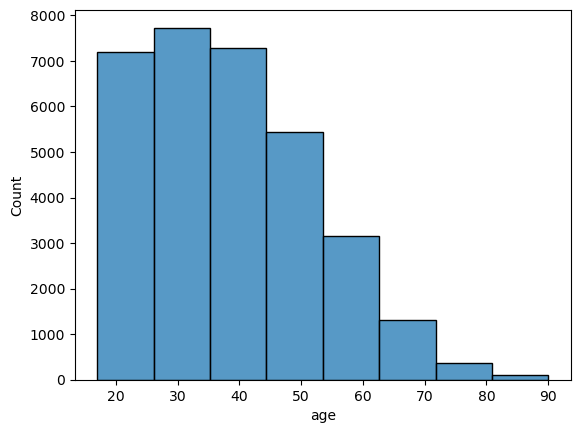

In [128]:
import seaborn as sns

# Histogram of age
sns.histplot(dataset['age'], bins=8) # Rule of thumb: Square root of the number of data points.
plt.show() 

# this allows me to see the distribution of people's age

<span style="font-size:19px; color:purple;">Education_Num & Education Column</span>

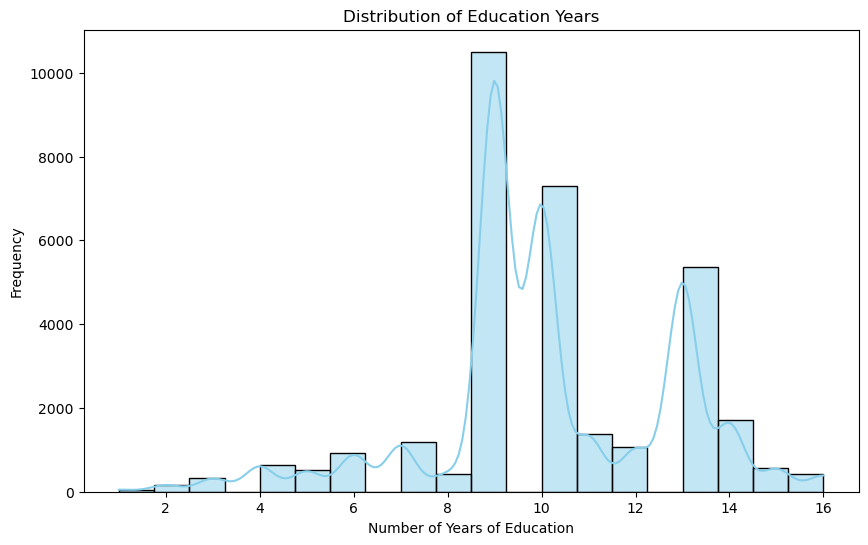

In [129]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histogram of 'education-num'
plt.figure(figsize=(10, 6))
sns.histplot(dataset['education-num'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Education Years')
plt.xlabel('Number of Years of Education')
plt.ylabel('Frequency')
plt.show()


<span style="font-size:19px; color:purple;">Income Column</span>

<span style="font-size:19px; color:purple;">Binning</span>

In [130]:
import pandas as pd

income_mapping = {"<=50K": 1, ">50K": 2}

dataset["income_category"] = dataset["income"].map(income_mapping)


In [131]:
# checking for unique values in the income dataset
dataset["income"].unique() 


array(['<=50K', '>50K'], dtype=object)

In [132]:
dataset.sample(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,workclass_missing,native-country_missing,occupation_missing,income_category
650,24,Private,556660,HS-grad,9,Never-married,Exec-managerial,Other-relative,White,Male,4101,0,50,United-States,<=50K,False,False,False,1
29469,35,Private,281982,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,>50K,False,False,False,2
23254,41,Self-emp-not-inc,174395,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,15024,0,55,United-States,>50K,False,False,False,2
12158,61,Self-emp-inc,119986,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States,<=50K,False,False,False,1
16239,37,Private,183345,Assoc-voc,11,Never-married,Craft-repair,Not-in-family,White,Male,0,0,45,United-States,<=50K,False,False,False,1


Income Distribution:
income_category     1     2
education                  
Preschool          51     0
1st-4th           162     6
5th-6th           317    16
7th-8th           606    40
9th               487    27
10th              871    62
11th             1115    60
12th              400    33
HS-grad          8826  1675
Some-college     5904  1387
Assoc-voc        1021   361
Assoc-acdm        802   265
Bachelors        3133  2221
Masters           764   959
Prof-school       153   423
Doctorate         107   306


Income Distribution Normalized:
income_category         1         2
education                          
Preschool        1.000000  0.000000
1st-4th          0.964286  0.035714
5th-6th          0.951952  0.048048
7th-8th          0.938080  0.061920
9th              0.947471  0.052529
10th             0.933548  0.066452
11th             0.948936  0.051064
12th             0.923788  0.076212
HS-grad          0.840491  0.159509
Some-college     0.809765  0.190235
Assoc-voc

<Figure size 1200x800 with 0 Axes>

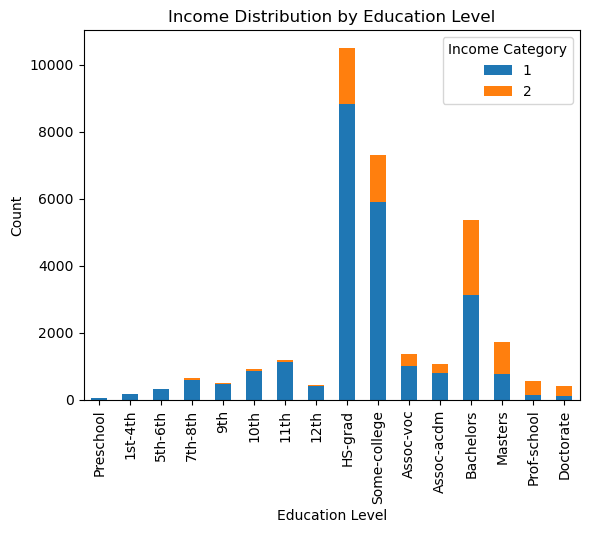

<Figure size 1200x800 with 0 Axes>

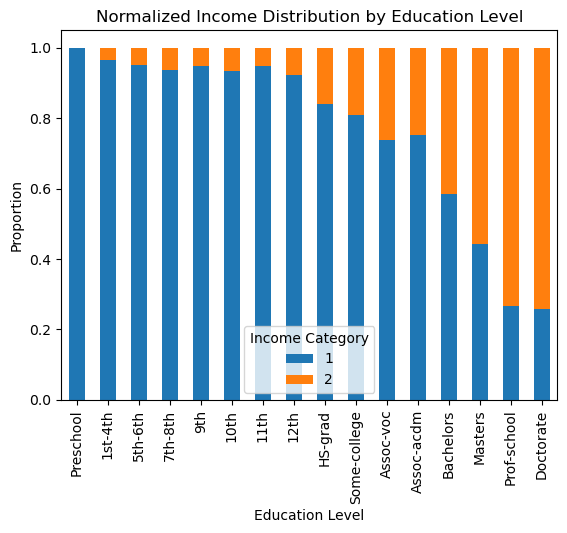

In [133]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the education order
education_order = [
    "Preschool", "1st-4th", "5th-6th", "7th-8th", "9th", "10th", "11th", "12th",
    "HS-grad", "Some-college", "Assoc-voc", "Assoc-acdm", "Bachelors", "Masters",
    "Prof-school", "Doctorate"
]

# Convert 'education' column to categorical with the specified order
dataset['education'] = pd.Categorical(dataset['education'], categories=education_order, ordered=True)

# Group by both education and income_category
income_distribution = dataset.groupby(["education", "income_category"])["income"].count().unstack()

# Normalize the data to proportions
income_distribution_normalized = income_distribution.div(income_distribution.sum(axis=1), axis=0)

# Print the distributions
print(f"Income Distribution:\n{income_distribution}\n\n")
print(f"Income Distribution Normalized:\n{income_distribution_normalized}\n\n")

# Plot the raw counts
plt.figure(figsize=(12, 8))
income_distribution.plot(kind='bar', stacked=True)
plt.title('Income Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Income Category')
plt.show()

# Plot the normalized proportions
plt.figure(figsize=(12, 8))
income_distribution_normalized.plot(kind='bar', stacked=True)
plt.title('Normalized Income Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Proportion')
plt.xticks(rotation=90)
plt.legend(title='Income Category')
plt.show()


In [134]:
dataset.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,workclass_missing,native-country_missing,occupation_missing,income_category
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,False,False,False,1
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,False,False,False,1
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,False,False,False,1
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,False,False,False,1
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,False,False,False,1


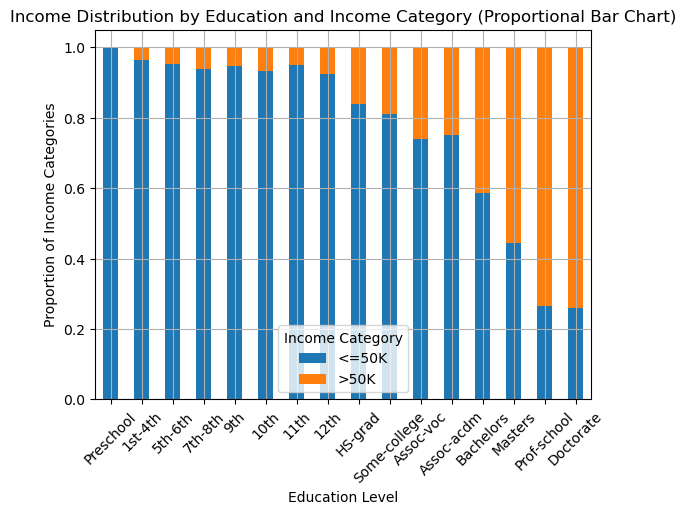

In [135]:
# Plotting the normalized data
income_distribution_normalized.plot(kind="bar", stacked=True)
plt.xlabel("Education Level")
plt.ylabel("Proportion of Income Categories")
plt.title("Income Distribution by Education and Income Category (Proportional Bar Chart)")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title="Income Category", labels=["<=50K", ">50K"])
plt.show()

# This analysis allowed me to understand that the education column contains ordinal features --> since there is a relationship between income and education

In [136]:
#  this also means that Ordinal Encoding should be done on education column

<span style="font-size:19px; color:purple;">Multicollinearity & Feature Importance - education and education_num column</span>

In [137]:
import pandas as pd

# Check the correlation
correlation = dataset['education-num'].corr(dataset['education'].astype('category').cat.codes)
print(f'Correlation between education and education_num: {correlation}')


Correlation between education and education_num: 1.0


In [138]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder

# Encode categorical 'education' column
label_encoder = LabelEncoder()
dataset['education_encoded'] = label_encoder.fit_transform(dataset['education'])

# Prepare features for VIF calculation
X = dataset[['education_encoded', 'education-num']]

# Calculate VIF
features = X.values
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(features, i) for i in range(features.shape[1])]

# Display VIF values
print(vif_data)


             Feature       VIF
0  education_encoded  8.355294
1      education-num  8.355294


In [139]:
# inf(infinity) means that the multicolinearity is Perfect Multicollinearity. 
# 8.355294 suggests a high level of multicollinearity. This indicates that the two variables are correlated, and it could be problematic

In [140]:
# Conducting feature importance between education_num and education column
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder


# Encode categorical variable
label_encoder = LabelEncoder()
dataset['education_encoded'] = label_encoder.fit_transform(dataset['education'])

# Define features and target
X = dataset[['education_encoded', 'education-num']]
y = dataset['income']

# Feature importance using RandomForest
model = RandomForestClassifier()
model.fit(X, y)
importance = model.feature_importances_
print(f'Feature importance: {importance}')

# RFE to determine important features
# Initialize RFE with a RandomForestClassifier as the estimator
rfe = RFE(estimator=model, n_features_to_select=1)
fit = rfe.fit(X, y)
print(f'Support: {fit.support_}')
print(f'Ranking: {fit.ranking_}')


Feature importance: [0.30757866 0.69242134]
Support: [False  True]
Ranking: [2 1]


In [141]:
# education_encoded is ranked 2, education-num is ranked 1, indicating it's the most important feature.


In [142]:
del dataset["education"]  # Deletes the "education-num" column
del dataset["education_encoded"]  # Deletes the "education-num" column
del dataset["fnlwgt"]  # Deletes the "education-num" column
# fnlwgt value is a weight assigned to each row, indicating how many people that row's data point 
# is meant to represent. This is particularly useful when dealing with sample surveys, allowing analysts 
# to make more accurate inferences about the population.

In [143]:
dataset.sample(10)

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,workclass_missing,native-country_missing,occupation_missing,income_category
12551,51,Private,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,42,United-States,<=50K,False,False,False,1
17179,45,Private,10,Divorced,Sales,Own-child,White,Male,0,0,45,United-States,<=50K,False,False,False,1
4675,17,Private,7,Never-married,Sales,Own-child,White,Male,0,0,20,United-States,<=50K,False,False,False,1
21675,48,Private,13,Divorced,Exec-managerial,Other-relative,White,Male,0,0,40,United-States,<=50K,False,False,False,1
16706,29,Local-gov,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,<=50K,False,False,False,1
23686,37,Private,9,Married-civ-spouse,Other-service,Husband,White,Male,0,0,45,Unknown,<=50K,False,True,False,1
28449,36,Private,12,Married-civ-spouse,Sales,Wife,White,Female,0,0,15,United-States,<=50K,False,False,False,1
19527,28,Private,9,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States,<=50K,False,False,False,1
21754,24,Private,13,Never-married,Adm-clerical,Not-in-family,White,Male,0,0,32,United-States,<=50K,False,False,False,1
1086,29,Private,13,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,35,United-States,<=50K,False,False,False,1


<span style="font-size:19px; color:purple;">Capital Gain and Capital Loss column</span>

In [144]:
# Feature enginnering - combining features

dataset['net_capital_gain_loss'] = dataset['capital-gain'] - dataset['capital-loss']

# Delete the capital-gain and capital-loss co\lumns
del dataset['capital-gain']
del dataset['capital-loss']

In [145]:
dataset.sample(5)

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income,workclass_missing,native-country_missing,occupation_missing,income_category,net_capital_gain_loss
32097,45,Private,9,Married-civ-spouse,Craft-repair,Husband,White,Male,60,United-States,>50K,False,False,False,2,7298
19756,40,Private,9,Married-civ-spouse,Other-service,Husband,White,Male,40,United-States,<=50K,False,False,False,1,0
9575,34,Private,9,Divorced,Adm-clerical,Unmarried,White,Female,35,United-States,<=50K,False,False,False,1,0
10069,28,Private,9,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,40,United-States,<=50K,False,False,False,1,0
10582,43,Private,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,50,United-States,>50K,False,False,False,2,0


/var/folders/r0/_zt1b7gx253726y5m4hf40p40000gn/T/ipykernel_3372/222524356.py:5: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



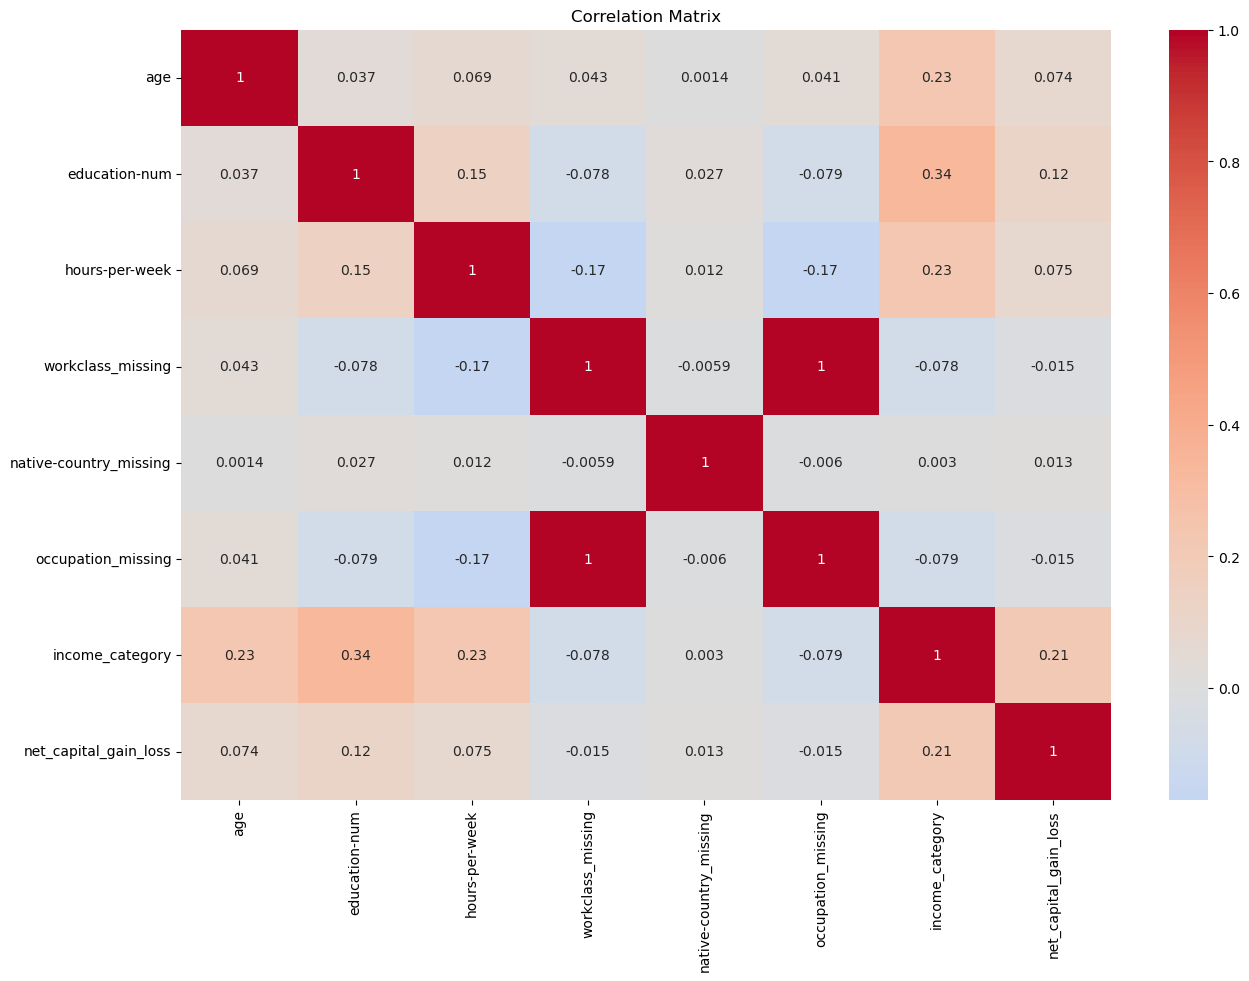

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = dataset.corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()


<span style="font-size:19px; color:purple;">Multicollinearity in categorical columns - marital-status and relationship column</span>

In [147]:
import pandas as pd
from scipy.stats import chi2_contingency

# Select the two categorical columns you want to test
column1 = 'marital-status'
column2 = 'relationship'

# Create a contingency table
contingency_table = pd.crosstab(dataset[column1], dataset[column2])
print('Contingency Table:')
print(contingency_table)

# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results This number represents how much the actual observed values in the table deviate 
# from what we would expect if there were no relationship between marital-status and relationship.
print(f'\nChi-Square Statistic: {chi2}')

# Think of the p-value as the probability that the observed differences happened by accident. 
# A p-value of 0.0 means there’s virtually no chance that these differences are random.
print(f'p-value: {p}')


print(f'Degrees of Freedom: {dof}')
# The expected frequencies are the counts we would expect in each cell of the table if there 
# were no relationship between the two variables. These are calculated based on the overall distribution 
# of the categories.
print('\nExpected Frequencies:')
print(expected)  #prints expected frequecy 


Contingency Table:
relationship           Husband  Not-in-family  Other-relative  Own-child  \
marital-status                                                             
Divorced                     0           2404             110        328   
Married-AF-spouse            9              0               1          1   
Married-civ-spouse       13184             17             124         95   
Married-spouse-absent        0            211              32         45   
Never-married                0           4705             611       4485   
Separated                    0            420              55         99   
Widowed                      0            547              48         15   

relationship           Unmarried  Wife  
marital-status                          
Divorced                    1601     0  
Married-AF-spouse              0    12  
Married-civ-spouse             0  1556  
Married-spouse-absent        130     0  
Never-married                881     0  
Separated

In [148]:
value_counts = dataset['marital-status'].value_counts()
print(value_counts)

Married-civ-spouse       14976
Never-married            10682
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: int64


In [149]:
value_counts = dataset['relationship'].value_counts()
print(value_counts)


Husband           13193
Not-in-family      8304
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64


In [150]:
# feature extraction
dataset['marital_relationship'] = (dataset['marital-status'].str.strip() + '_' +
                                    dataset['relationship'].str.strip()).str.lower()

# .strip and .lower were used to ensure uniformity in the data


# Delete column 'maritial-status' and 'relationship'
del dataset['marital-status']
del dataset['relationship']

In [151]:
dataset.sample(5)

,age,workclass,education-num,occupation,race,sex,hours-per-week,native-country,income,workclass_missing,native-country_missing,occupation_missing,income_category,net_capital_gain_loss,marital_relationship
13607,27,Unknown Workclass,5,Unknown occupation,White,Female,40,United-States,<=50K,True,False,True,1,0,never-married_own-child
858,49,Private,13,Exec-managerial,White,Female,56,United-States,>50K,False,False,False,2,0,never-married_not-in-family
16815,49,Local-gov,13,Prof-specialty,White,Female,50,France,<=50K,False,False,False,1,0,divorced_unmarried
31176,50,Private,9,Other-service,White,Female,25,United-States,<=50K,False,False,False,1,0,divorced_unmarried
10203,30,Private,11,Prof-specialty,White,Female,40,United-States,<=50K,False,False,False,1,0,never-married_not-in-family


In [152]:
del dataset['income']

In [153]:
dataset.sample(5)

,age,workclass,education-num,occupation,race,sex,hours-per-week,native-country,workclass_missing,native-country_missing,occupation_missing,income_category,net_capital_gain_loss,marital_relationship
21657,39,Private,14,Prof-specialty,White,Male,40,United-States,False,False,False,2,0,married-civ-spouse_husband
22219,90,Private,13,Prof-specialty,Asian-Pac-Islander,Male,40,United-States,False,False,False,1,0,never-married_not-in-family
24738,17,Private,7,Handlers-cleaners,White,Male,20,Peru,False,False,False,1,0,never-married_own-child
25186,36,Federal-gov,10,Handlers-cleaners,White,Male,50,United-States,False,False,False,1,0,married-civ-spouse_husband
18098,30,Local-gov,9,Other-service,Black,Male,40,United-States,False,False,False,1,0,married-civ-spouse_husband


In [154]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Label Encoding for ordinal feature 'education'
# label_encoder = LabelEncoder()
# dataset_encoded['education'] = label_encoder.fit_transform(dataset['education'])

# Perform one-hot encoding for selected columns
one_hot_columns = ['workclass', 'occupation', 'race', 'sex']
dataset_encoded = pd.get_dummies(dataset, columns=one_hot_columns, drop_first=True)

# Calculate the threshold for rare category replacement
tot_instances = dataset_encoded.shape[0]
threshold = tot_instances * 0.005
print(f"Threshold: {threshold}")

# Apply thresholding to categorical columns
obj_columns = list(dataset_encoded.select_dtypes(include=[object]).columns)

for col in obj_columns:
    value_counts = dataset_encoded[col].value_counts()
    rare_categories = value_counts[value_counts < threshold].index
    dataset_encoded[col] = dataset_encoded[col].replace(rare_categories, 'RARE')

# Frequency encoding for 'native-country'
def frequency_encode(df, col):
    freq_encoding = df[col].value_counts().to_dict()
    df[col] = df[col].map(freq_encoding)
    return df

dataset_encoded = frequency_encode(dataset_encoded, 'native-country')
dataset_encoded = frequency_encode(dataset_encoded, 'marital_relationship')

# Include numeric columns in feature set
numeric_columns = ['hours-per-week', 'net_capital_gain_loss', 'age', 'education-num']
X = dataset_encoded.drop('income_category', axis=1)  # as 'income' is the target variable
X = pd.concat([X, dataset_encoded[numeric_columns]], axis=1)  # Add numeric columns
y = dataset_encoded['income_category']  # Target variable

# Encode the target labels - ensures consistency for training and testing data
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


Threshold: 162.8


In [155]:
dataset.sample(5)

,age,workclass,education-num,occupation,race,sex,hours-per-week,native-country,workclass_missing,native-country_missing,occupation_missing,income_category,net_capital_gain_loss,marital_relationship
18348,24,Private,10,Sales,White,Male,35,United-States,False,False,False,1,0,never-married_own-child
6236,55,Self-emp-not-inc,4,Farming-fishing,White,Male,50,United-States,False,False,False,1,0,married-civ-spouse_husband
24433,42,Private,16,Prof-specialty,White,Male,50,United-States,False,False,False,1,0,never-married_not-in-family
24664,37,Local-gov,14,Prof-specialty,White,Female,45,United-States,False,False,False,2,0,married-civ-spouse_wife
10496,24,Private,9,Machine-op-inspct,White,Male,40,United-States,False,False,False,1,0,divorced_not-in-family


In [157]:
csv_file_path = "modified-dataset.csv"  # Specify your desired file path
dataset.to_csv(csv_file_path, index=False)  # index=False to avoid writing row numbers

In [86]:
def print_metrics(y_true, y_pred):
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    TN, FP, FN, TP = cm.ravel()

    # Calculate metrics using scikit-learn functions
    accuracy = accuracy_score(y_true, y_pred)
    error_rate = (FP + FN) / (TP + TN + FP + FN)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    fpr = FP / (FP + TN) if (FP + TN) != 0 else 0
    roc_auc = roc_auc_score(y_true, y_pred)

    # Calculate normalized confusion matrix
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Print metrics
    print(f"Confusion Matrix:\n{cm}")
    print(f"Normalized Confusion Matrix:\n{cm_normalized}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Error Rate: {error_rate:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")        
    print(f"True Positive Rate (Recall/Sensitivity): {recall:.4f}")
    print(f"False Positive Rate: {fpr:.4f}")

In [63]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Normalize the feature set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Hyperparameter Tuning with GridSearchCV including K-Fold Cross Validation

In [64]:
from sklearn.model_selection import GridSearchCV

best_models = {}
cv_results = {}

In [65]:
# Define each model and its parameter grid

model_lr = LogisticRegression(max_iter=1000)
model_name = "Logistic Regression"
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs', 'newton-cg']
}

print(f"Tuning hyperparameters for {model_name}...")

# k-fold cross-validation included with hyperparameter tuning 
grid_search = GridSearchCV(model_lr, param_grid_lr, cv=5)
grid_search.fit(X_train, y_train)
best_models[model_name] = grid_search.best_estimator_
print(f"Best parameters for {model_name}: {grid_search.best_params_}")

# Store and print the mean test scores for each hyperparameter combination
mean_scores = grid_search.cv_results_['mean_test_score']
params = grid_search.cv_results_['params']
for mean, params in zip(mean_scores, params):
    print(f"Mean score: {mean:.3f} for params: {params}")


Tuning hyperparameters for Logistic Regression...


/Users/slight_meaning/anaconda3/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning:

The line search algorithm did not converge

/Users/slight_meaning/anaconda3/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning:

The line search algorithm did not converge

/Users/slight_meaning/anaconda3/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning:

The line search algorithm did not converge

/Users/slight_meaning/anaconda3/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning:

The line search algorithm did not converge

/Users/slight_meaning/anaconda3/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:416: LineSearchWarning:

Rounding errors prevent the line search from converging

/Users/slight_meaning/anaconda3/lib/python3.10/site-packages/sklearn/utils/optimize.py:203: UserWarning:

Line Search failed

/Users/slight_meaning/anaconda3/lib/python3.10/site-packages/

/Users/slight_meaning/anaconda3/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:416: LineSearchWarning:

Rounding errors prevent the line search from converging

/Users/slight_meaning/anaconda3/lib/python3.10/site-packages/sklearn/utils/optimize.py:203: UserWarning:

Line Search failed

/Users/slight_meaning/anaconda3/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning:

The line search algorithm did not converge

/Users/slight_meaning/anaconda3/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning:

The line search algorithm did not converge

/Users/slight_meaning/anaconda3/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:416: LineSearchWarning:

Rounding errors prevent the line search from converging

/Users/slight_meaning/anaconda3/lib/python3.10/site-packages/sklearn/utils/optimize.py:203: UserWarning:

Line Search failed

/Users/slight_meaning/anaconda3/lib/python3.10/site-packages/scipy/optimize/_lines

Best parameters for Logistic Regression: {'C': 1, 'solver': 'newton-cg'}
Mean score: 0.778 for params: {'C': 0.001, 'solver': 'liblinear'}
Mean score: 0.790 for params: {'C': 0.001, 'solver': 'lbfgs'}
Mean score: 0.832 for params: {'C': 0.001, 'solver': 'newton-cg'}
Mean score: 0.783 for params: {'C': 0.01, 'solver': 'liblinear'}
Mean score: 0.813 for params: {'C': 0.01, 'solver': 'lbfgs'}
Mean score: 0.837 for params: {'C': 0.01, 'solver': 'newton-cg'}
Mean score: 0.779 for params: {'C': 0.1, 'solver': 'liblinear'}
Mean score: 0.783 for params: {'C': 0.1, 'solver': 'lbfgs'}
Mean score: 0.839 for params: {'C': 0.1, 'solver': 'newton-cg'}
Mean score: 0.779 for params: {'C': 1, 'solver': 'liblinear'}
Mean score: 0.803 for params: {'C': 1, 'solver': 'lbfgs'}
Mean score: 0.839 for params: {'C': 1, 'solver': 'newton-cg'}
Mean score: 0.788 for params: {'C': 10, 'solver': 'liblinear'}
Mean score: 0.797 for params: {'C': 10, 'solver': 'lbfgs'}
Mean score: 0.839 for params: {'C': 10, 'solver': 

/Users/slight_meaning/anaconda3/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:416: LineSearchWarning:

Rounding errors prevent the line search from converging

/Users/slight_meaning/anaconda3/lib/python3.10/site-packages/sklearn/utils/optimize.py:203: UserWarning:

Line Search failed



In [66]:
model_rf = RandomForestClassifier(random_state=42)
model_name = "Random Forest"
param_grid_rf = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

print(f"Tuning hyperparameters for {model_name}...")

# k-fold cross-validation included with hyperparameter tuning 
grid_search = GridSearchCV(model_rf, param_grid_rf, cv=5)
grid_search.fit(X_train, y_train)
best_models[model_name] = grid_search.best_estimator_
print(f"Best parameters for {model_name}: {grid_search.best_params_}")

# Store and print the mean test scores for each hyperparameter combination
mean_scores = grid_search.cv_results_['mean_test_score']
params = grid_search.cv_results_['params']
for mean, params in zip(mean_scores, params):
    print(f"Mean score: {mean:.3f} for params: {params}")



Tuning hyperparameters for Random Forest...
Best parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 200}
Mean score: 0.845 for params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 10}
Mean score: 0.851 for params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Mean score: 0.850 for params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Mean score: 0.852 for params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Mean score: 0.849 for params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 10}
Mean score: 0.855 for params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}
Mean score: 0.856 for params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Mean score: 0.857 for params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Mean score: 0.853 for params: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 10}
Mean s

In [67]:
model_knn = KNeighborsClassifier()
model_name = "K-Nearest Neighbors"
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

print(f"Tuning hyperparameters for {model_name}...")

# k-fold cross-validation included with hyperparameter tuning 
grid_search = GridSearchCV(model_knn, param_grid_knn, cv=5)
grid_search.fit(X_train, y_train)
best_models[model_name] = grid_search.best_estimator_
print(f"Best parameters for {model_name}: {grid_search.best_params_}")

# Store and print the mean test scores for each hyperparameter combination
mean_scores = grid_search.cv_results_['mean_test_score']
params = grid_search.cv_results_['params']
for mean, params in zip(mean_scores, params):
    print(f"Mean score: {mean:.3f} for params: {params}")


Tuning hyperparameters for K-Nearest Neighbors...
Best parameters for K-Nearest Neighbors: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
Mean score: 0.840 for params: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
Mean score: 0.839 for params: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Mean score: 0.846 for params: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
Mean score: 0.843 for params: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
Mean score: 0.849 for params: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
Mean score: 0.847 for params: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
Mean score: 0.850 for params: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
Mean score: 0.848 for params: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
Mean score: 0.840 for params: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'unifo

In [68]:
model_dt = DecisionTreeClassifier(random_state=42)
model_name = "Decision Tree"
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10, 50]
}

print(f"Tuning hyperparameters for {model_name}...")

# k-fold cross-validation included with hyperparameter tuning 
grid_search = GridSearchCV(model_dt, param_grid_dt, cv=5)
grid_search.fit(X_train, y_train)
best_models[model_name] = grid_search.best_estimator_
print(f"Best parameters for {model_name}: {grid_search.best_params_}")

# Store and print the mean test scores for each hyperparameter combination
mean_scores = grid_search.cv_results_['mean_test_score']
params = grid_search.cv_results_['params']
for mean, params in zip(mean_scores, params):
    print(f"Mean score: {mean:.3f} for params: {params}")


Tuning hyperparameters for Decision Tree...
Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 5}
Mean score: 0.818 for params: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}
Mean score: 0.826 for params: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 5}
Mean score: 0.834 for params: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 10}
Mean score: 0.848 for params: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}
Mean score: 0.848 for params: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 5}
Mean score: 0.848 for params: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 10}
Mean score: 0.850 for params: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2}
Mean score: 0.850 for params: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 5}
Mean score: 0.850 for params: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 10}
Mean score: 

In [69]:
model_svm = SVC(probability=True, random_state=42)
model_name = "Support Vector Machine"
param_grid_svm = {
    'C': [0.01, 0.1, 1, 10, 100],
}

print(f"Tuning hyperparameters for {model_name}...")

# k-fold cross-validation included with hyperparameter tuning 
grid_search = GridSearchCV(model_svm, param_grid_svm, cv=5)
grid_search.fit(X_train, y_train)
best_models[model_name] = grid_search.best_estimator_
print(f"Best parameters for {model_name}: {grid_search.best_params_}")

# Store and print the mean test scores for each hyperparameter combination
mean_scores = grid_search.cv_results_['mean_test_score']
params = grid_search.cv_results_['params']
for mean, params in zip(mean_scores, params):
    print(f"Mean score: {mean:.3f} for params: {params}")


Tuning hyperparameters for Support Vector Machine...
Best parameters for Support Vector Machine: {'C': 100}
Mean score: 0.785 for params: {'C': 0.01}
Mean score: 0.800 for params: {'C': 0.1}
Mean score: 0.801 for params: {'C': 1}
Mean score: 0.811 for params: {'C': 10}
Mean score: 0.814 for params: {'C': 100}


In [70]:
"""
Perform hyperparameter tuning using GridSearchCV on the training data with k-fold cross-validation.
Select the best model based on cross-validation performance.
Evaluate the selected model on the test data.
"""

'Perform hyperparameter tuning using GridSearchCV on the training data with k-fold cross-validation.\nSelect the best model based on cross-validation performance.\nEvaluate the selected model on the test data.\n'

In [88]:
# each model and its best parameter grid
models_and_grids = [
    (LogisticRegression, "Logistic Regression", {
        'C': 1, 'solver': 'newton-cg'
    }),
    (RandomForestClassifier, "Random Forest", {
        'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 200
    }),
    (KNeighborsClassifier, "K-Nearest Neighbors", {
        'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'
    }),
    (DecisionTreeClassifier, "Decision Tree", {
       'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 5 
    })
]

In [89]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate the best models using k-fold cross-validation
for model_class, model_name, param_grid in models_and_grids:
    print(f"\n\nEvaluating {model_name} with k-fold cross-validation...")
    
    fold_metrics = []  # List to store metrics for each fold

    for train_index, val_index in kf.split(X_train_scaled):
        X_fold_train, X_fold_val = X_train_scaled[train_index], X_train_scaled[val_index]
        y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]
        
         # Reinitialize the model for each fold
        model = model_class(**param_grid)
        
        # Fit the model
        model.fit(X_fold_train, y_fold_train)
        # Make predictions
        y_pred_val = model.predict(X_fold_val)
        
        # Calculate and store metrics for this fold
        fold_metrics.append({
            'accuracy': accuracy_score(y_fold_val, y_pred_val),
            'precision': precision_score(y_fold_val, y_pred_val),
            'recall': recall_score(y_fold_val, y_pred_val),
            'f1_score': f1_score(y_fold_val, y_pred_val),
            'roc_auc': roc_auc_score(y_fold_val, y_pred_val)
        })
        
#         # Print metrics for this fold
#         print_metrics(y_fold_val, y_pred_val)

    # Calculate average metrics across all folds
    avg_metrics = {
        'accuracy': sum(f['accuracy'] for f in fold_metrics) / len(fold_metrics),
        'precision': sum(f['precision'] for f in fold_metrics) / len(fold_metrics),
        'recall': sum(f['recall'] for f in fold_metrics) / len(fold_metrics),
        'f1_score': sum(f['f1_score'] for f in fold_metrics) / len(fold_metrics),
        'roc_auc': sum(f['roc_auc'] for f in fold_metrics) / len(fold_metrics),
    }
    
    print(f"\nAverage metrics across folds for {model_name}:")
    print(f"Accuracy: {avg_metrics['accuracy']:.3f}, Precision: {avg_metrics['precision']:.3f}, "
          f"Recall: {avg_metrics['recall']:.3f}, F1 Score: {avg_metrics['f1_score']:.3f}, "
          f"ROC AUC: {avg_metrics['roc_auc']:.3f}")
    
    # Final evaluation on the test set
    y_pred_test = model.predict(X_test_scaled)
    print(f"\nFinal evaluation on test set for {model_name}:")
    print_metrics(y_test, y_pred_test)




Evaluating Logistic Regression with k-fold cross-validation...

Average metrics across folds for Logistic Regression:
Accuracy: 0.840, Precision: 0.728, Recall: 0.529, F1 Score: 0.613, ROC AUC: 0.733

Final evaluation on test set for Logistic Regression:
Confusion Matrix:
[[4583  329]
 [ 728  872]]
Normalized Confusion Matrix:
[[0.93302117 0.06697883]
 [0.455      0.545     ]]
Accuracy: 0.8377
Error Rate: 0.1623
Precision: 0.7261
F1 Score: 0.6226
ROC-AUC: 0.7390
True Positive Rate (Recall/Sensitivity): 0.5450
False Positive Rate: 0.0670


Evaluating Random Forest with k-fold cross-validation...

Average metrics across folds for Random Forest:
Accuracy: 0.861, Precision: 0.781, Recall: 0.581, F1 Score: 0.666, ROC AUC: 0.765

Final evaluation on test set for Random Forest:
Confusion Matrix:
[[4655  257]
 [ 641  959]]
Normalized Confusion Matrix:
[[0.94767915 0.05232085]
 [0.400625   0.599375  ]]
Accuracy: 0.8621
Error Rate: 0.1379
Precision: 0.7887
F1 Score: 0.6811
ROC-AUC: 0.7735
True

## Best Performing Model: Random Forest

It has the highest average accuracy (0.861) and final test accuracy (0.8621) among the models.
It also exhibits the best precision (0.7887), a good recall (0.5994), and the highest F1 score (0.6811) and ROC AUC (0.7735) compared to the other models.
Overall, the Random Forest model consistently outperforms the others across multiple metrics, making it the best choice for your classification task based on the provided results.


In [91]:
import joblib
from sklearn.ensemble import RandomForestClassifier

# Assuming you have already trained your model
best_model = RandomForestClassifier(random_state=42)
best_model.fit(X_train, y_train)

# Save the model to a file
joblib.dump(best_model, 'best_model.pkl')


['best_model.pkl']

In [92]:
# Save the scaler
scaler = StandardScaler()
scaler.fit(X_train)
joblib.dump(scaler, 'scaler.pkl')

# Save the label encoder
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
joblib.dump(label_encoder, 'label_encoder.pkl')


['label_encoder.pkl']

When evaluating the AI model, the first 3 things I had in my mind as a user were clarity of the response, relevance to the question, and completeness in the response. Starting off with the question; “What are the key differences between Streamlit and other web frameworks like Flask?”. I found the response to be relevant to the question. However, I believe the response lacked clarity and completeness to the question. The response was just a block of paragraphs, as a user that might get overwhelming. Having bullet points in an answer makes the information more digestible. Adding on, after stating a point within the paragraph, the AI did not elaborate further. For example, after writing this line of response “Streamlit allows rapid prototyping and iteration, making it ideal for data science projects.” it stopped and moved on to the next paragraph.

Besides, that I was focussing on the problem-solving of the AI and the engagement as well. I found that the AI actually made comments such as “Surely!” or “Hope this helps” made the experience more human-like. However, with regards to problem-solving, it lacks depth in its answer. For example, I asked "Can you show me an example of a Streamlit app that visualizes data from a pandas DataFrame?" The response was quite limited and could have been more detailed with the response. I compared it performance with other AI bots available on the internet and found that the depth of it response was something that was common. I find that this is very important as this AI assistant is planned to be used for self-learning which means the student has many questions to ask and the AI has to be detailed with its responses. 

From my previous experience when using the AI, it would not work and I would receive an error message. However, I am glad the AI model started working eventually. The time taken to respond to the user was not too prolonged and overall was a comfortable self-learning journey. Overall, I am satisfied with my self-learning journey using the TP AI assistant bot. 


# IGNORE BELOW

In [73]:

# kf = KFold(n_splits=5, shuffle=True, random_state=42)

# # Evaluate the best models using k-fold cross-validation
# for model_name, model in best_models.items():
#     print(f"\n\nEvaluating {model_name}...")
    
#     for train_index, val_index in kf.split(X_train):
#         X_fold_train, X_fold_val = X_train[train_index], X_train[val_index]
#         y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]
        
#         # Fit the model
#         model.fit(X_fold_train, y_fold_train)
#         # Make predictions
#         y_pred_val = model.predict(X_fold_val)
#         # Print metrics
#         print_metrics(y_fold_val, y_pred_val)
    
#     # Final evaluation on the test set
#     y_pred_test = model.predict(X_test)
#     print(f"\nFinal evaluation on test set for {model_name}:")
#     print_metrics(y_test, y_pred_test)


In [ ]:
# # Define models to evaluate
# models = {
#     "Logistic Regression": LogisticRegression(max_iter=1000),
#     "Random Forest": RandomForestClassifier(random_state=42),
#     "Support Vector Machine": SVC(probability=True, random_state=42),
#     "K-Nearest Neighbors": KNeighborsClassifier(),
#     "Decision Tree": DecisionTreeClassifier(random_state=42),
#     "Gradient Boosting": GradientBoostingClassifier(random_state=42),
#     "AdaBoost": AdaBoostClassifier(random_state=42)
# }


In [90]:
# from sklearn.model_selection import GridSearchCV

# # Define parameter grids for each model
# param_grids = {
#     "Logistic Regression": {
#         'C': [0.001, 0.01, 0.1, 1, 10, 100],
#         'solver': ['liblinear', 'lbfgs', 'newton-cg']
#     },
#     "Random Forest": {
#         'n_estimators': [10, 50, 100, 200],
#         'max_depth': [None, 10, 20, 30],
#         'min_samples_split': [2, 5, 10]
#     },
#     "Support Vector Machine": {
#         'C': [0.01, 0.1, 1, 10, 100],
#         'kernel': ['linear', 'rbf', 'poly']
#     },
#     "K-Nearest Neighbors": {
#         'n_neighbors': [3, 5, 7, 9],
#         'weights': ['uniform', 'distance'],
#         'metric': ['euclidean', 'manhattan']
#     },
#     "Decision Tree": {
#         'criterion': ['gini', 'entropy'],
#         'max_depth': [None, 5, 10, 20],
#         'min_samples_split': [2, 5, 10]
#     },
#     "Gradient Boosting": {
#         'n_estimators': [50, 100, 150],
#         'learning_rate': [0.01, 0.1, 0.2],
#         'max_depth': [3, 5, 7]
#     },
#     "AdaBoost": {
#         'n_estimators': [50, 100]
#     }
# }

# best_models = {}

# for model_name, model in models.items():
#     print(f"Tuning hyperparameters for {model_name}...")
#     grid_search = GridSearchCV(model, param_grids[model_name], cv=5)
#     grid_search.fit(X_train, y_train)
#     best_models[model_name] = grid_search.best_estimator_
#     print(f"Best parameters for {model_name}: {grid_search.best_params_}")


In [ ]:
# import pandas as pd
# from sklearn.preprocessing import LabelEncoder, StandardScaler
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# import xgboost as xgb
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Sample dataset (replace with your actual dataset)
# # dataset = pd.read_csv('your_data.csv')

# # Shuffle the dataset
# # X_scaled, y_encoded = shuffle(X_scaled, y_encoded, random_state=42)

# # Split the data
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# # Standardize the features
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# # Define parameter grid for Random Forest
# param_grid_rf = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
# }

# # Create a Random Forest model
# rf = RandomForestClassifier(random_state=42)

# # Perform Grid Search with Cross-Validation
# grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf,
#                                cv=3, n_jobs=-1, scoring='roc_auc')
# grid_search_rf.fit(X_train, y_train)

# # Get the best parameters and the best model
# best_rf = grid_search_rf.best_estimator_
# print("Best Parameters for Random Forest:", grid_search_rf.best_params_)

# # Evaluate the best model
# y_pred_rf = best_rf.predict(X_test)
# print("Random Forest after Hyperparameter Tuning:")
# print(classification_report(y_test, y_pred_rf))
# print("ROC-AUC:", roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1]))

# # Plot confusion matrix
# def plot_confusion_matrix(y_true, y_pred, model_name):
#     cm = confusion_matrix(y_true, y_pred)
    
#     # Normalize the confusion matrix
#     cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#     print(cm_normalized)
    
#     plt.figure(figsize=(8, 6))
#     sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', 
#                 xticklabels=['Negative', 'Positive'], 
#                 yticklabels=['Negative', 'Positive'])
#     plt.title(f'Confusion Matrix for {model_name}')
#     plt.xlabel('Predicted')
#     plt.ylabel('True')
#     plt.show()

# plot_confusion_matrix(y_test, y_pred_rf, "Random Forest after Hyperparameter Tuning")

# # Repeat similar steps for other models (XGBoost, SVC, etc.)


In [ ]:
# import pandas as pd
# from sklearn.preprocessing import LabelEncoder, StandardScaler
# from sklearn.model_selection import train_test_split, KFold, cross_val_score
# from sklearn.metrics import classification_report, roc_auc_score
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# import xgboost as xgb
# from sklearn.tree import DecisionTreeClassifier

# # Sample dataset (replace with your actual dataset)
# # dataset = pd.read_csv('your_data.csv')

# # Shuffle the dataset
# # Assuming X_scaled and y_encoded are defined
# # X_scaled, y_encoded = shuffle(X_scaled, y_encoded, random_state=42)

# # Split the data
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# # StandardScaler
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# # Define models for cross-validation
# models = {
#     "Logistic Regression": LogisticRegression(max_iter=1000),
#     "Random Forest": RandomForestClassifier(random_state=42),
#     "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
#     "Support Vector Machine": SVC(probability=True, random_state=42),
#     "K-Nearest Neighbors": KNeighborsClassifier()
# }

# # K-Fold Cross-Validation
# kf = KFold(n_splits=5, shuffle=True, random_state=42)

# for model_name, model in models.items():
#     # Cross-validate
#     cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='roc_auc')
#     print(f"{model_name} - Mean ROC-AUC: {cv_scores.mean():.4f}")

#     # Fit the model on the full training set and evaluate
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     print(classification_report(y_test, y_pred))
#     print("ROC-AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))
#     print("-" * 50)  # Separator for clarity


In [ ]:
# import pandas as pd
# from sklearn.preprocessing import LabelEncoder, StandardScaler
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report, roc_auc_score
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# import xgboost as xgb
# from sklearn.utils import shuffle
# from sklearn.tree import DecisionTreeClassifier

# # Sample dataset (replace with your actual dataset)
# # dataset = pd.read_csv('your_data.csv')



# # Shuffle the dataset
# X_scaled, y_encoded = shuffle(X_scaled, y_encoded, random_state=42)

# # Split the data
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# # Logistic Regression
# log_reg = LogisticRegression(max_iter=1000)
# log_reg.fit(X_train, y_train)
# y_pred_log_reg = log_reg.predict(X_test)
# print("Logistic Regression:")
# print(classification_report(y_test, y_pred_log_reg))
# print("ROC-AUC:", roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1]))

# # Random Forest
# rf = RandomForestClassifier(random_state=42)
# rf.fit(X_train, y_train)
# y_pred_rf = rf.predict(X_test)
# print("Random Forest:")
# print(classification_report(y_test, y_pred_rf))
# print("ROC-AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))

# # XGBoost
# xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
# xgb_model.fit(X_train, y_train)
# y_pred_xgb = xgb_model.predict(X_test)
# print("XGBoost:")
# print(classification_report(y_test, y_pred_xgb))
# # print("ROC-AUC:", roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1]))
# print("ROC-AUC:", roc_auc_score(y_test, y_pred_xgb))


# # Support Vector Machine
# svm_model = SVC(probability=True, random_state=42)
# svm_model.fit(X_train, y_train)
# y_pred_svm = svm_model.predict(X_test)
# print("Support Vector Machine:")
# print(classification_report(y_test, y_pred_svm))
# # print("ROC-AUC:", roc_auc_score(y_test, svm_model.predict_proba(X_test)[:, 1]))
# print("ROC-AUC:", roc_auc_score(y_test, y_pred_svm))


# # K-Nearest Neighbors
# knn_model = KNeighborsClassifier()
# knn_model.fit(X_train, y_train)
# y_pred_knn = knn_model.predict(X_test)
# print("K-Nearest Neighbors:")
# print(classification_report(y_test, y_pred_knn))
# # print("ROC-AUC:", roc_auc_score(y_test, knn_model.predict_proba(X_test)[:, 1]))
# print("ROC-AUC:", roc_auc_score(y_test, y_pred_knn))


In [ ]:
# from sklearn.model_selection import learning_curve
# import matplotlib.pyplot as plt


# # Check for overfitting using learning curves
# models = {
#     "Logistic Regression": log_reg,
#     "Random Forest": rf,
#     "XGBoost": xgb_model,
#     "SVM": svm_model,
#     "KNN": knn_model
# }

# # Train models and check for overfitting
# for name, model in models.items():
#     model.fit(X_train, y_train)
    
#     train_accuracy = model.score(X_train, y_train)
#     test_accuracy = model.score(X_test, y_test)
    
#     print(f"\n{name} Results:")
#     print(f"Training Accuracy: {train_accuracy:.4f}")
#     print(f"Test Accuracy: {test_accuracy:.4f}")
    
#     if train_accuracy > test_accuracy:
#         print("Model may be overfitting")
    
#     # Learning Curve
#     train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))
    
#     train_mean = np.mean(train_scores, axis=1)
#     train_std = np.std(train_scores, axis=1)
#     test_mean = np.mean(test_scores, axis=1)
#     test_std = np.std(test_scores, axis=1)
    
#     plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
#     plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

#     plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
#     plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")

#     plt.xlabel("Training examples")
#     plt.ylabel("Score")
#     plt.title(f"Learning Curve: {name}")
#     plt.legend(loc="best")
#     plt.grid()
#     plt.show()

In [ ]:
# import pandas as pd
# from sklearn.preprocessing import LabelEncoder, StandardScaler
# from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
# from sklearn.metrics import classification_report, roc_auc_score
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# import xgboost as xgb
# from sklearn.utils import shuffle
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.feature_selection import SelectFromModel
# from sklearn.model_selection import learning_curve
# import matplotlib.pyplot as plt
# import numpy as np

# # Sample dataset (replace with your actual dataset)
# # dataset = pd.read_csv('your_data.csv')

# # Shuffle the dataset
# X_scaled, y_encoded = shuffle(X_scaled, y_encoded, random_state=42)

# # Split the data
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# # Define the number of folds for cross-validation
# num_folds = 5
# kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# # Function to plot learning curve
# def plot_learning_curve(model, X_train, y_train, name):
#     train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))
#     train_mean = np.mean(train_scores, axis=1)
#     train_std = np.std(train_scores, axis=1)
#     test_mean = np.mean(test_scores, axis=1)
#     test_std = np.std(test_scores, axis=1)

#     plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
#     plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

#     plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
#     plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")

#     plt.xlabel("Training examples")
#     plt.ylabel("Score")
#     plt.title(f"Learning Curve: {name}")
#     plt.legend(loc="best")
#     plt.grid()
#     plt.show()

# # Step 1: Cross-Validation and Model Evaluation

# # Logistic Regression with Cross-Validation
# log_reg = LogisticRegression(max_iter=1000, random_state=42)
# cv_scores = cross_val_score(log_reg, X_train, y_train, cv=kfold)
# print("Logistic Regression Cross-Validation Scores:", cv_scores)
# print("Logistic Regression Average Cross-Validation Score:", cv_scores.mean())

# # Step 2: Simplify Your Model
# # Example: Limiting the depth of a Decision Tree
# decision_tree = DecisionTreeClassifier(max_depth=5, random_state=42)
# cv_scores = cross_val_score(decision_tree, X_train, y_train, cv=kfold)
# print("Decision Tree Cross-Validation Scores:", cv_scores)
# print("Decision Tree Average Cross-Validation Score:", cv_scores.mean())

# # Step 3: Regularization
# # Logistic Regression with L2 regularization
# log_reg_l2 = LogisticRegression(penalty='l2', C=0.1, max_iter=1000, random_state=42)
# cv_scores = cross_val_score(log_reg_l2, X_train, y_train, cv=kfold)
# print("Logistic Regression with L2 regularization Cross-Validation Scores:", cv_scores)
# print("Logistic Regression with L2 regularization Average Cross-Validation Score:", cv_scores.mean())

# # Step 4: Prune Features
# # Example: Feature selection with Random Forest
# rf = RandomForestClassifier(random_state=42)
# rf.fit(X_train, y_train)
# selector = SelectFromModel(rf, prefit=True)
# X_train_reduced = selector.transform(X_train)
# X_test_reduced = selector.transform(X_test)

# # Train model on reduced feature set
# log_reg_reduced = LogisticRegression(max_iter=1000, random_state=42)
# cv_scores = cross_val_score(log_reg_reduced, X_train_reduced, y_train, cv=kfold)
# print("Logistic Regression on reduced feature set Cross-Validation Scores:", cv_scores)
# print("Logistic Regression on reduced feature set Average Cross-Validation Score:", cv_scores.mean())

# # Step 5: Ensemble Methods
# # Bagging with Decision Trees
# bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
# cv_scores = cross_val_score(bagging, X_train, y_train, cv=kfold)
# print("Bagging Classifier Cross-Validation Scores:", cv_scores)
# print("Bagging Classifier Average Cross-Validation Score:", cv_scores.mean())

# # Step 6: Hyperparameter Tuning
# # Hyperparameter tuning with GridSearchCV for Logistic Regression
# log_reg_params = {
#     'penalty': ['l1', 'l2'],
#     'C': [0.01, 0.1, 1, 10],
#     'solver': ['liblinear', 'saga']
# }
# grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), log_reg_params, cv=kfold)
# grid_search.fit(X_train, y_train)
# best_log_reg = grid_search.best_estimator_
# cv_scores = cross_val_score(best_log_reg, X_train, y_train, cv=kfold)
# print("Best Logistic Regression model Cross-Validation Scores:", cv_scores)
# print("Best Logistic Regression model Average Cross-Validation Score:", cv_scores.mean())

# # Evaluate the selected models on the test set
# models = {
#     "Logistic Regression": log_reg,
#     "Decision Tree": decision_tree,
#     "Logistic Regression L2": log_reg_l2,
#     "Reduced Features Logistic Regression": log_reg_reduced,
#     "Bagging Classifier": bagging,
#     "Best Logistic Regression": best_log_reg
# }

# for name, model in models.items():
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     print(f"\n{name} Results:")
#     print(classification_report(y_test, y_pred))
#     print("ROC-AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))
    
#     # Plot learning curve
#     plot_learning_curve(model, X_train, y_train, name)


In [ ]:
# import pandas as pd
# from sklearn.preprocessing import LabelEncoder, StandardScaler
# from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
# from sklearn.metrics import classification_report, roc_auc_score
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# import xgboost as xgb
# from sklearn.utils import shuffle
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.feature_selection import SelectFromModel
# from sklearn.model_selection import learning_curve
# import matplotlib.pyplot as plt
# import numpy as np

# # Sample dataset (replace with your actual dataset)
# # dataset = pd.read_csv('your_data.csv')

# # Shuffle the dataset
# X_scaled, y_encoded = shuffle(X_scaled, y_encoded, random_state=42)

# # Split the data
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# # Define the number of folds for cross-validation
# num_folds = 5
# kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# # Function to plot learning curve
# def plot_learning_curve(model, X_train, y_train, name):
#     train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))
#     train_mean = np.mean(train_scores, axis=1)
#     train_std = np.std(train_scores, axis=1)
#     test_mean = np.mean(test_scores, axis=1)
#     test_std = np.std(test_scores, axis=1)

#     plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
#     plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

#     plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
#     plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")

#     plt.xlabel("Training examples")
#     plt.ylabel("Score")
#     plt.title(f"Learning Curve: {name}")
#     plt.legend(loc="best")
#     plt.grid()
#     plt.show()

# # Step 1: Cross-Validation and Model Evaluation

# # Logistic Regression with Cross-Validation
# log_reg = LogisticRegression(max_iter=1000, random_state=42)
# cv_scores = cross_val_score(log_reg, X_train, y_train, cv=kfold)
# print("Logistic Regression Cross-Validation Scores:", cv_scores)
# print("Logistic Regression Average Cross-Validation Score:", cv_scores.mean())

# # Step 2: Simplify Your Model
# # Example: Limiting the depth of a Decision Tree
# decision_tree = DecisionTreeClassifier(max_depth=5, random_state=42)
# cv_scores = cross_val_score(decision_tree, X_train, y_train, cv=kfold)
# print("Decision Tree Cross-Validation Scores:", cv_scores)
# print("Decision Tree Average Cross-Validation Score:", cv_scores.mean())

# # Step 3: Regularization
# # Logistic Regression with L2 regularization
# log_reg_l2 = LogisticRegression(penalty='l2', C=0.1, max_iter=1000, random_state=42)
# cv_scores = cross_val_score(log_reg_l2, X_train, y_train, cv=kfold)
# print("Logistic Regression with L2 regularization Cross-Validation Scores:", cv_scores)
# print("Logistic Regression with L2 regularization Average Cross-Validation Score:", cv_scores.mean())

# # Step 4: Prune Features
# # Example: Feature selection with Random Forest
# rf = RandomForestClassifier(random_state=42)
# rf.fit(X_train, y_train)
# selector = SelectFromModel(rf, prefit=True)
# X_train_reduced = selector.transform(X_train)
# X_test_reduced = selector.transform(X_test)
# print("-------")
# # print(X_train_reduced.sample())
# # print(X_test_reduced)

# # Train model on reduced feature set
# log_reg_reduced = LogisticRegression(max_iter=1000, random_state=42)
# cv_scores = cross_val_score(log_reg_reduced, X_train_reduced, y_train, cv=kfold)
# print("Logistic Regression on reduced feature set Cross-Validation Scores:", cv_scores)
# print("Logistic Regression on reduced feature set Average Cross-Validation Score:", cv_scores.mean())

# # Step 5: Ensemble Methods
# # Bagging with Decision Trees
# bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
# cv_scores = cross_val_score(bagging, X_train, y_train, cv=kfold)
# print("Bagging Classifier Cross-Validation Scores:", cv_scores)
# print("Bagging Classifier Average Cross-Validation Score:", cv_scores.mean())

# # Step 6: Hyperparameter Tuning
# # Hyperparameter tuning with GridSearchCV for Logistic Regression
# log_reg_params = {
#     'penalty': ['l1', 'l2'],
#     'C': [0.01, 0.1, 1, 10],
#     'solver': ['liblinear', 'saga']
# }
# grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), log_reg_params, cv=kfold)
# grid_search.fit(X_train, y_train)
# best_log_reg = grid_search.best_estimator_
# cv_scores = cross_val_score(best_log_reg, X_train, y_train, cv=kfold)
# print("Best Logistic Regression model Cross-Validation Scores:", cv_scores)
# print("Best Logistic Regression model Average Cross-Validation Score:", cv_scores.mean())

# # Evaluate the selected models on the test set
# models = {
#     "Logistic Regression": log_reg,
#     "Decision Tree": decision_tree,
#     "Logistic Regression L2": log_reg_l2,
#     "Reduced Features Logistic Regression": log_reg_reduced,
#     "Bagging Classifier": bagging,
#     "Best Logistic Regression": best_log_reg
# }

# for name, model in models.items():
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     print(f"\n{name} Results:")
#     print(classification_report(y_test, y_pred))
#     print("ROC-AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))
    
#     # Plot learning curve
#     plot_learning_curve(model, X_train, y_train, name)
